In [68]:
import os

from diagrams import Cluster, Diagram, Edge
from diagrams.custom import Custom
from diagrams.onprem.database import Cockroachdb

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

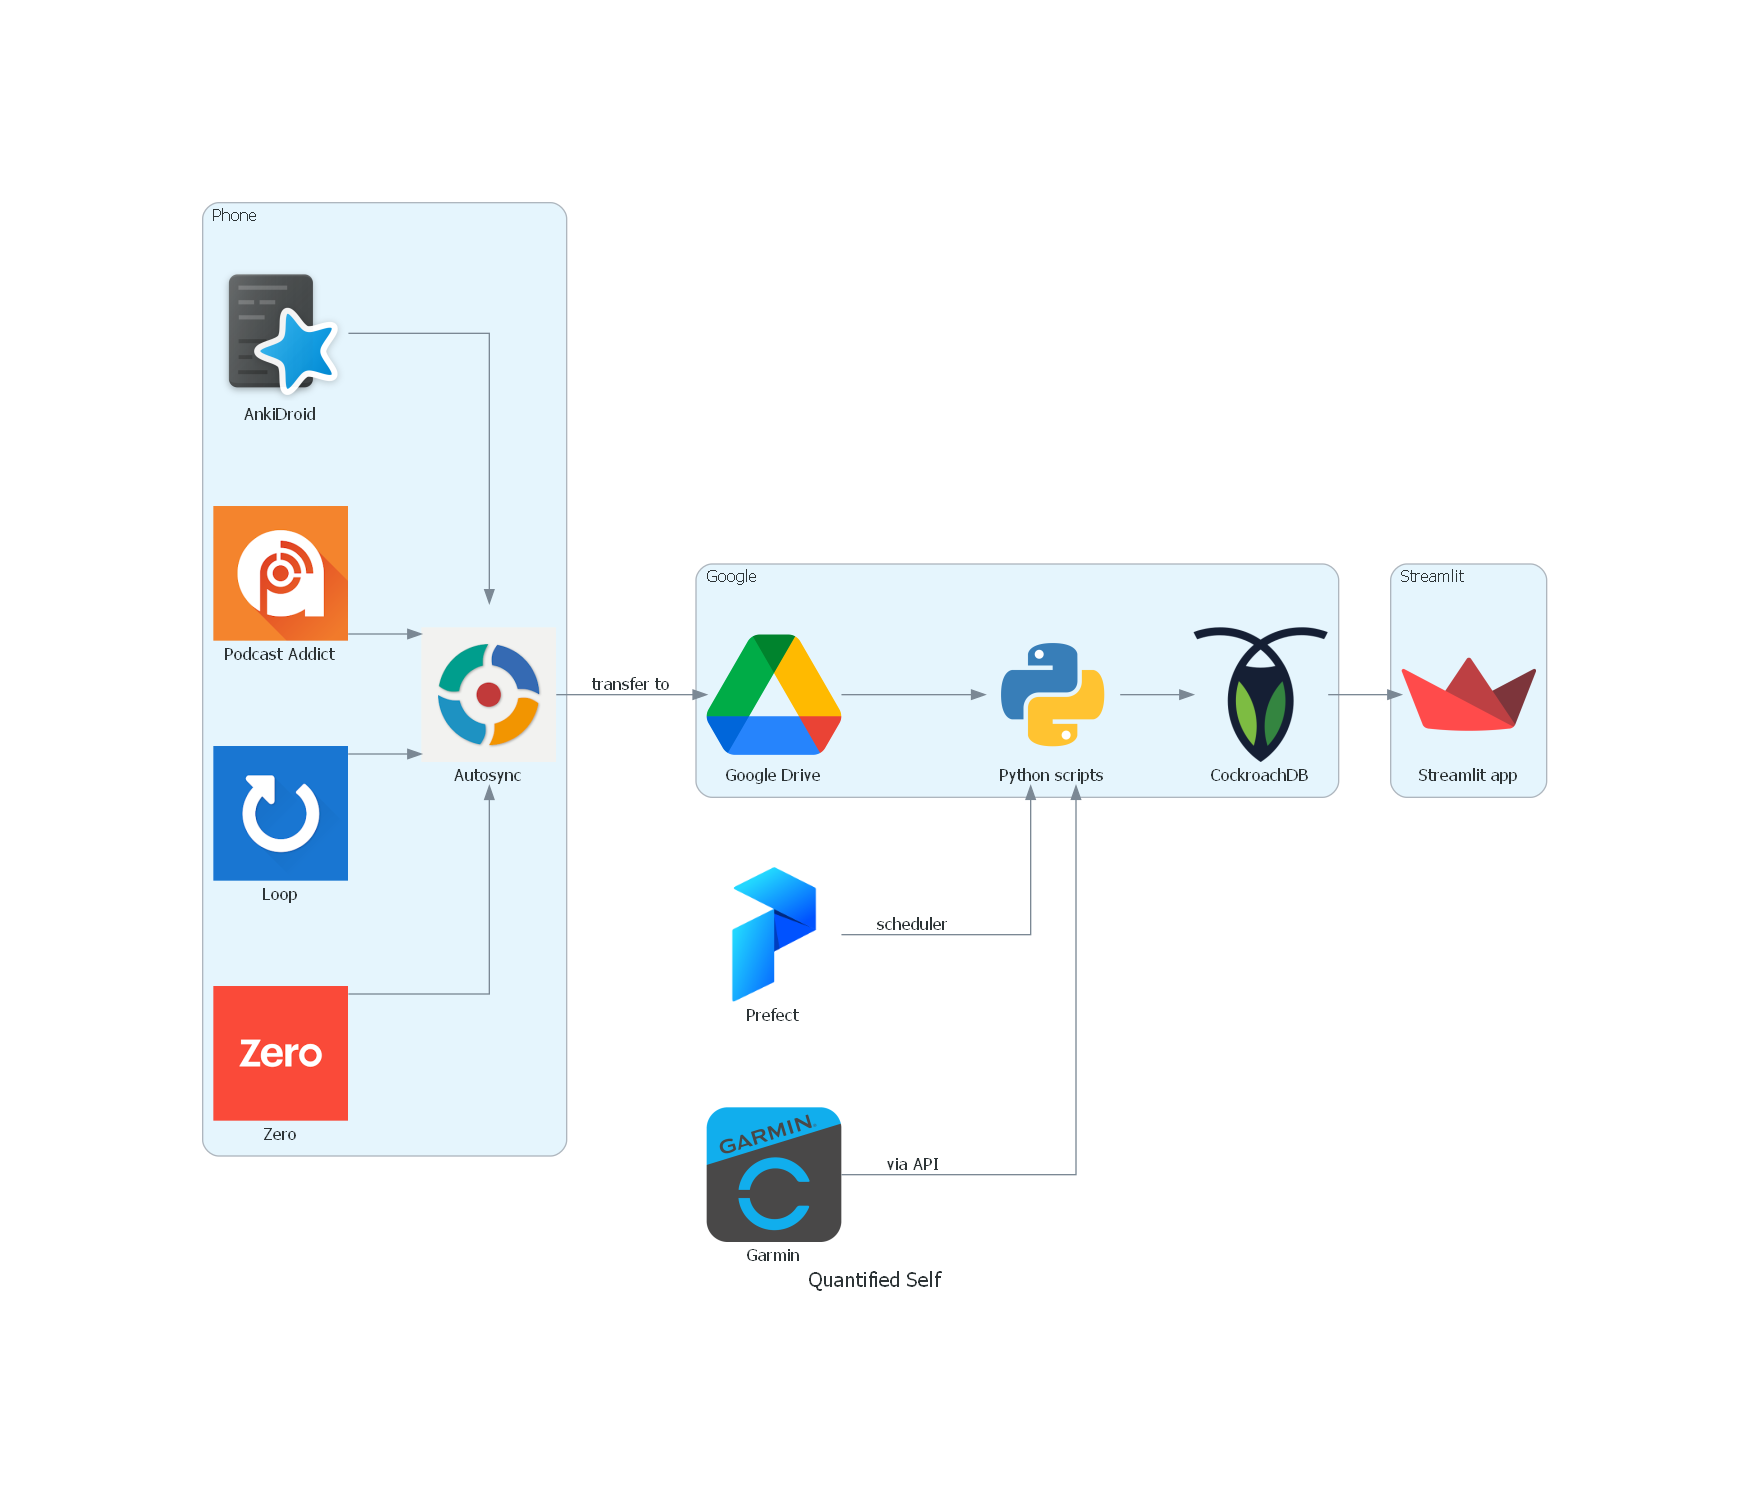

In [69]:
with Diagram('Quantified Self', show=False, direction='LR') as diag:
    with Cluster('Phone'):
        anki = Custom("AnkiDroid", 'logo/anki.png')
        podcast_addict = Custom('Podcast Addict', 'logo/podcast_addict.png')
        loop = Custom('Loop', 'logo/loop.png')
        zero = Custom('Zero', 'logo/zero.png')
        
        autosync = Custom('Autosync', 'logo/autosync.png')
        
        anki >> autosync
        podcast_addict >> autosync
        loop >> autosync
        zero >> autosync 
    
    with Cluster('Google'):
        
        google_drive = Custom('Google Drive', 'logo/google_drive.png')
        cockroachdb = Cockroachdb('CockroachDB')
        python = Custom('Python scripts', 'logo/python.png')
        
        autosync >> Edge(label='transfer to') >> google_drive >> python
        
        python >> cockroachdb
    
    prefect = Custom('Prefect', 'logo/prefect.png')
    prefect >> Edge(label='scheduler') >> python
    
    garmin = Custom('Garmin', 'logo/garmin.png')
    garmin >> Edge(label='via API') >> python
    
    
    
    with Cluster('Streamlit'):
        streamlit  = Custom('Streamlit app', 'logo/streamlit.png')
    
    cockroachdb >> streamlit
    
diag